In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.style.use('bmh')


In [105]:
def check_null(df):
    """
    Check null values in dataframe
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['NULL values', 'Percent'])
    print(missing_data.head(20))
    

def handle_missing_data(df):
    
    #  Dropping rows if all values in that row are missing. 
    df.dropna(how='all')

    # removing column if it has more than 60% missing values 
    df2 = df[[column for column in df if df[column].count() / len(df) >= 0.4]]
    # print(len(df2.columns))
    # print(len(df.columns))
    if len(df.columns) - len(df2.columns)  > 0:
        print("List of dropped columns:", end=" ")
        for c in df.columns:
            if c not in df2.columns:
                print(c, end=", ")
        print('\n')
    df = df2
    # df.dropna(inplace=True)       
    # df.fillna(inplace=True)
    


In [276]:
def analyize(df):
    # heatmap with big font
    # print(df.corr())
    plt.figure(figsize=(20,20))
    sns.heatmap(df.corr(), annot=True, linewidths=0.5, annot_kws={'size': 20}, cmap='viridis')
    plt.show()
    df_num = df.select_dtypes(include=['float64', 'int64'])

    # df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
    corr = df.corr()
    # print(corr)
    # print(corr['id'][:-1])
    for i in corr.columns:
        for j in corr.columns:
            correlation = abs(corr[i][j])
            if correlation > 0.5 and i != j:
                print(f'{i} and {j} are highly correlated\n coorelation = {correlation}')
                # plt.figure
                sns.pairplot(data=df,
                            x_vars=i,
                            y_vars=j , size = 10)
                plt.show()
            if i == j :
                break;
    

In [277]:
# a function that performs automatic EDA on a file it can either be csv or xlsx
def auto_eda(in_path):
    if os.path.isfile(in_path):
        print(f'analyzing {in_path}')
        
        file_type = in_path.split('.')[-1]
        if file_type == 'csv':
            df = pd.read_csv(in_path)
        elif file_type == 'xlsx':
            df = pd.read_excel(in_path)
        else:
            print('File type not supported')
            return
    else:
        print(f'analyzing folder {in_path}')
        [auto_eda(os.path.join(in_path , i)) for i in os.listdir(in_path)]
        return


    # print(df.info())
    # check for null values
    # check_null(df)
    
    # handling missing data with fillna
    # print(df.info())
    print(df.shape)
    handle_missing_data(df)
    # print(df.info())
    print(df.shape)

    
    analyize(df)
    
    print(f'end of analysis of {in_path}')


In [278]:
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 'Data Police shootings',
 'EDA.ipynb',
 'Retail Data Analytics']

analyzing folder .\data police shootings
analyzing .\data police shootings\fatal-police-shootings-data.csv
(5416, 14)
(5416, 14)


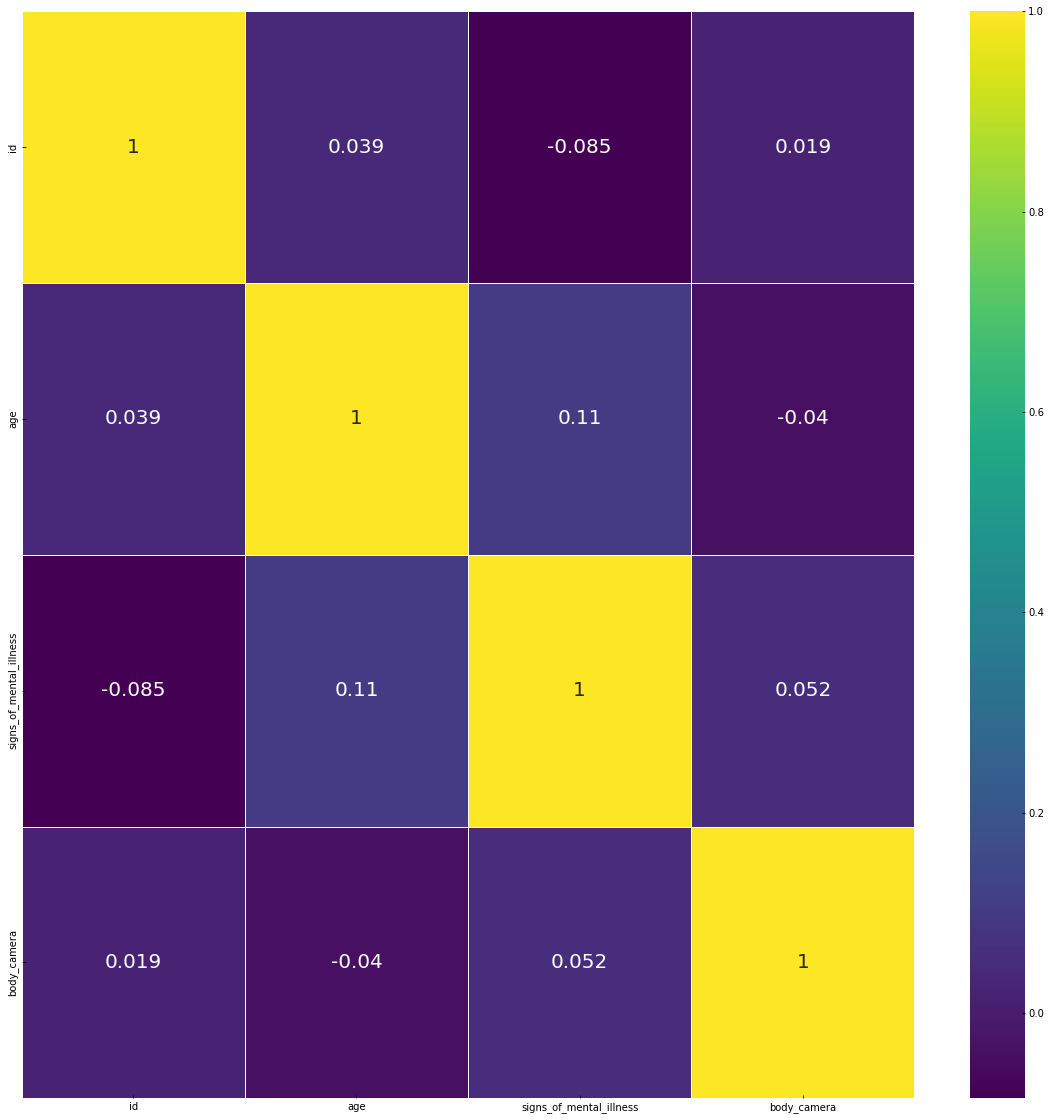

end of analysis of .\data police shootings\fatal-police-shootings-data.csv


In [279]:
# test the function 

auto_eda('.\\data police shootings')



analyzing .\Retail Data Analytics\Features data set.csv
(8190, 12)
List of dropped columns: MarkDown2, 

(8190, 12)


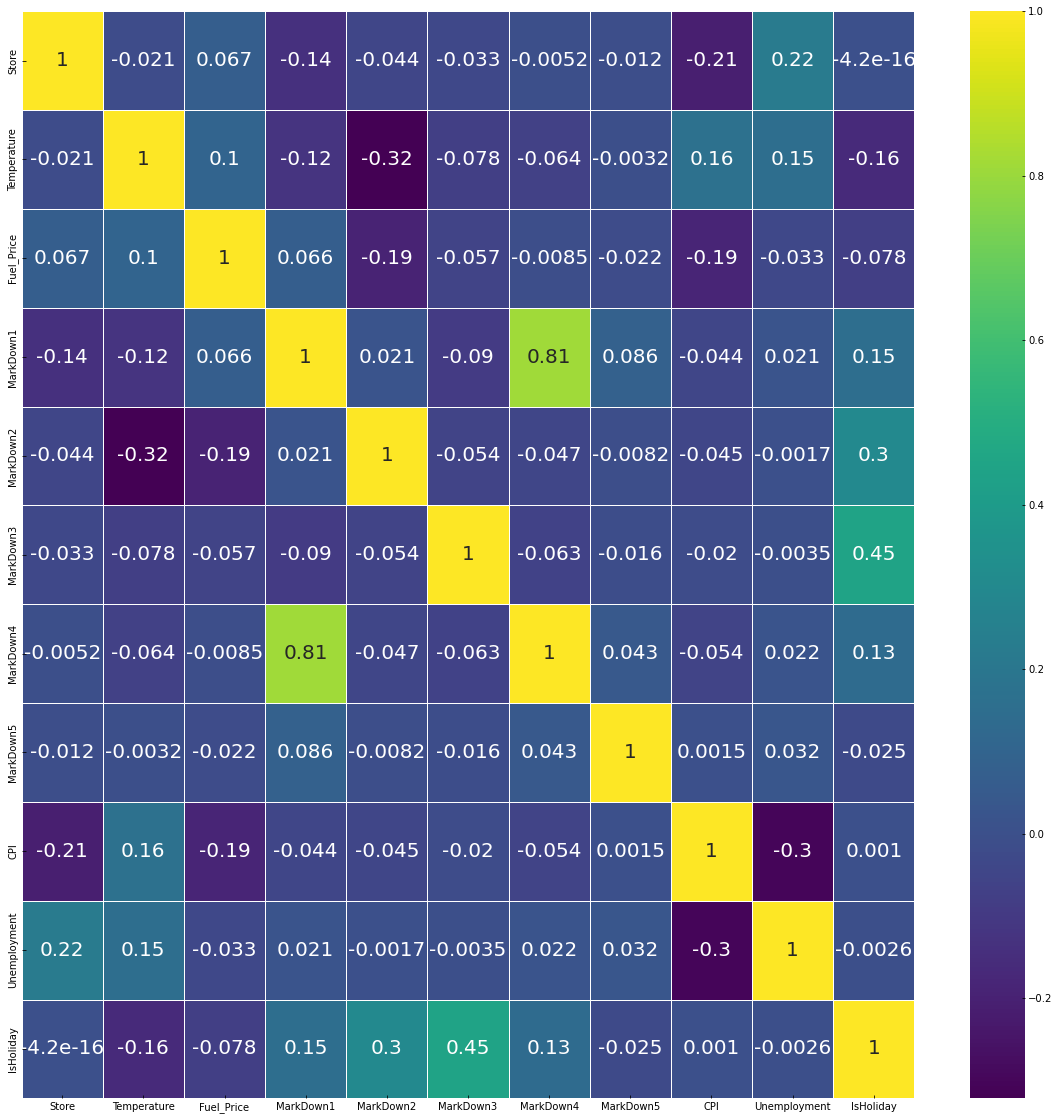

MarkDown4 and MarkDown1 are highly correlated
 coorelation = 0.8104553749412023


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


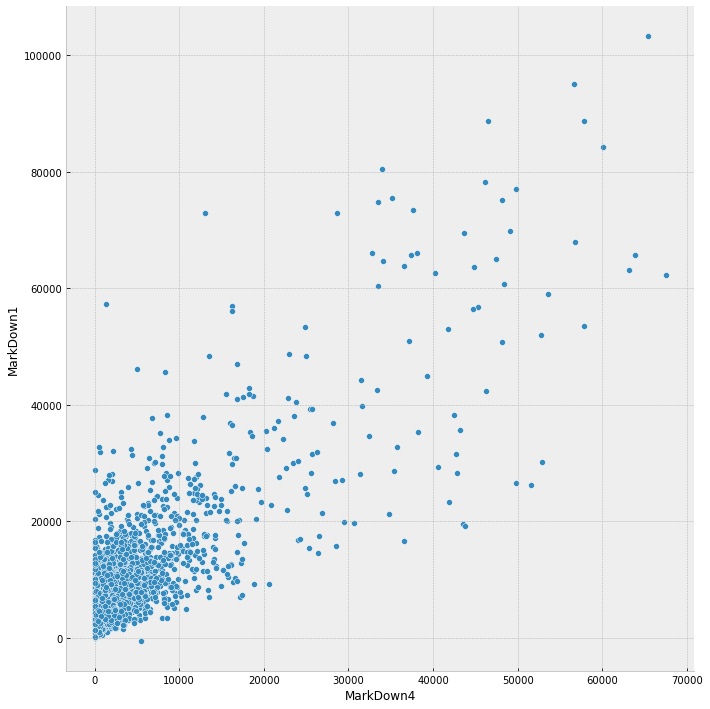

end of analysis of .\Retail Data Analytics\Features data set.csv


In [280]:
auto_eda('.\\Retail Data Analytics\\Features data set.csv')
# 

In [9]:
    # # print the first 5 rows of the dataframe
    # print(df.head())

    # # print the last 5 rows of the dataframe
    # print(df.tail())

    # # print the shape of the dataframe
    # print(df.shape)

    # # print the columns of the dataframe
    # print(df.columns)

    # print the info of the dataframe
    # print(df.info())

    # print the describe of the dataframe
    # print(df.describe())

    # # print the correlation of the dataframe
    # print(df.corr())

    # # plot the correlation of the dataframe
    # sns.heatmap(df.corr(), annot=True)
    # plt.show()

    # # plot the histogram of the dataframe
    # df.hist(bins=50, figsize=(20, 15))
    # plt.show()

    # # plot the boxplot of the dataframe
    # df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
    # plt.show()

    # # plot the areaplot of the dataframe
    # df.plot(kind='area', subplots=True, layout=(3, 3), sharex=False)
    # plt.show()

    # # plot the histogram of the dataframe
    # df.plot(kind='hist', subplots=True, layout=(3, 3), sharex=False)
    # plt.show()

    # # # plot the scatterplot of the dataframe
    # # df.plot(kind='scatter', subplots=True, layout=(3, 3), sharex=False)
    # # plt.show()

    # # plot the density of the dataframe
    # df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
    # plt.show()

    # # plot the barplot of the dataframe
    # df.plot(kind='bar', subplots=True, layout=(3, 3), sharex=False)
    # plt.show()